In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
Loans_DF = pd.read_csv('all_loans_application.csv') #import loans dataset

In [3]:
Loans_DF['LOAN_CLASSIFICATION'].unique() #check for unique values

array(['PERFORMING', 'NON-PERFORMING'], dtype=object)

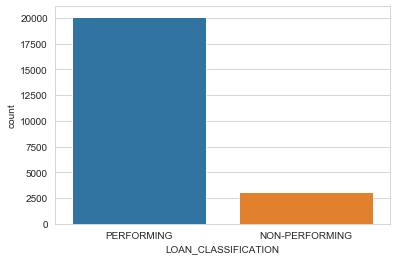

In [4]:
sns.set_style('whitegrid')
sns.countplot(data= Loans_DF, x='LOAN_CLASSIFICATION') #explore target variables

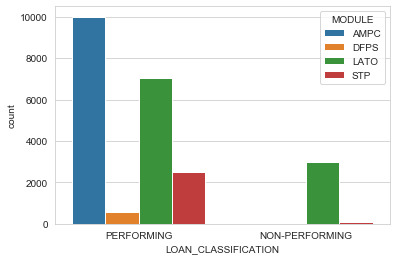

In [37]:
sns.set_style('whitegrid')
sns.countplot(data= Loans_DF, x='LOAN_CLASSIFICATION', hue='MODULE')  #Module doesn't seem to affect loan performance significantly so we can drop it

In [38]:
Loans_DF.head()

,CUSTOMER_UNIQUE_ID,OFFERID,INCR_ALLOWED,APPLIED_AMOUNT,DATE_OF_APPLY,APPLICATION_STATUS,MODULE,LOAN_CLASSIFICATION
0,562966000,099AMPC173040537,370803.43,1040.0,10/31/2017 10:36:23 AM,D,AMPC,PERFORMING
1,562966000,099AMPC173040537,370803.43,1040.0,10/31/2017 10:37:10 AM,D,AMPC,PERFORMING
2,562966000,099AMPC173040539,370803.43,1040.0,10/31/2017 10:39:06 AM,D,AMPC,PERFORMING
3,867156003,099AMPC173040543,15278.69,13000.0,10/31/2017 10:44:39 AM,D,AMPC,PERFORMING
4,747196003,099AMPC173040545,136863.90,1000.0,10/31/2017 10:44:58 AM,D,AMPC,PERFORMING


In [48]:
#drop unnecessary columns
Loans_DF['APPLICATION_STATUS'].unique()
Loans_DF.drop('MODULE', axis =1, inplace =True)
Loans_DF.drop('DATE_OF_APPLY', axis =1, inplace =True)
Loans_DF.drop('OFFERID', axis =1, inplace =True)
Loans_DF.drop('INCR_ALLOWED', axis =1, inplace =True)

In [49]:
all_loans = pd.read_csv('all_loans.csv')

In [41]:
all_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278505 entries, 0 to 278504
Data columns (total 11 columns):
CUSTOMER_UNIQUE_ID    278505 non-null int64
LOAN_REF              278505 non-null object
PRODUCT_CODE          278505 non-null object
PRODUCT_NAME          278505 non-null object
BOOK_DATE             278505 non-null object
MATURITY_DATE         278505 non-null object
AMOUNT_FINANCED       278505 non-null float64
CURRENCY              278505 non-null object
ACCOUNT_STATUS        278505 non-null object
MASKED_ACCOUNT        278505 non-null object
DURATION_IN_DAYS      278505 non-null int64
dtypes: float64(1), int64(2), object(8)
memory usage: 23.4+ MB


In [50]:
#all_loans.drop('LOAN_REF', axis = 1, inplace = True)
all_loans.drop('PRODUCT_NAME', axis = 1, inplace = True)
all_loans.drop('CURRENCY', axis = 1, inplace = True)
all_loans.drop('ACCOUNT_STATUS', axis = 1, inplace = True)
all_loans.drop('MASKED_ACCOUNT', axis = 1, inplace = True)
#all_loans.drop('BOOK_DATE', axis = 1, inplace = True)
#all_loans.drop('MATURITY_DATE', axis = 1, inplace = True)


In [7]:
all_loans.columns

Index(['CUSTOMER_UNIQUE_ID', 'LOAN_REF', 'PRODUCT_CODE', 'BOOK_DATE',
       'MATURITY_DATE', 'AMOUNT_FINANCED', 'DURATION_IN_DAYS'],
      dtype='object')

In [51]:
Master_DF=Loans_DF.set_index('CUSTOMER_UNIQUE_ID').join(all_loans.set_index('CUSTOMER_UNIQUE_ID')) #join dataframes

In [9]:
Master_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400289 entries, 56000 to 999944001
Data columns (total 9 columns):
APPLIED_AMOUNT         400289 non-null float64
APPLICATION_STATUS     400289 non-null object
LOAN_CLASSIFICATION    400289 non-null object
LOAN_REF               400289 non-null object
PRODUCT_CODE           400289 non-null object
BOOK_DATE              400289 non-null object
MATURITY_DATE          400289 non-null object
AMOUNT_FINANCED        400289 non-null float64
DURATION_IN_DAYS       400289 non-null int64
dtypes: float64(2), int64(1), object(6)
memory usage: 30.5+ MB


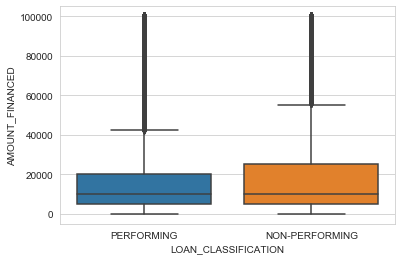

In [46]:
sns.boxplot(data = Master_DF[Master_DF['AMOUNT_FINANCED']<=100000], x='LOAN_CLASSIFICATION', y = 'AMOUNT_FINANCED')
#Loans_DF.columns

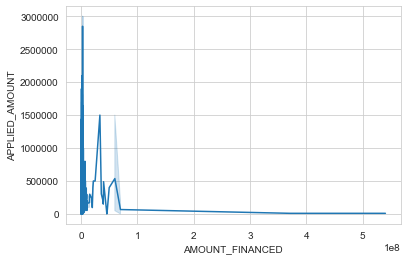

In [15]:
sns.lineplot(data=Master_DF, x='AMOUNT_FINANCED', y='APPLIED_AMOUNT')

In [0]:
Master_DF.tail()

,APPLIED_AMOUNT,APPLICATION_STATUS,LOAN_CLASSIFICATION,LOAN_REF,PRODUCT_CODE,BOOK_DATE,MATURITY_DATE,AMOUNT_FINANCED,DURATION_IN_DAYS
CUSTOMER_UNIQUE_ID,,,,,,,,,
999944001,4000.0,D,PERFORMING,099PDLP190511320,PDLP,2/20/2019,3/22/2019,12000.0,30
999944001,4000.0,D,PERFORMING,099AMPC182642106,AMPC,9/21/2018,10/21/2018,14000.0,30
999944001,4000.0,D,PERFORMING,099AMPC181581975,AMPC,6/7/2018,7/7/2018,13000.0,30
999944001,4000.0,D,PERFORMING,099AMPC180051282,AMPC,1/5/2018,2/4/2018,3000.0,30
999944001,4000.0,D,PERFORMING,099AMPC181522798,AMPC,6/1/2018,7/1/2018,1000.0,30


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

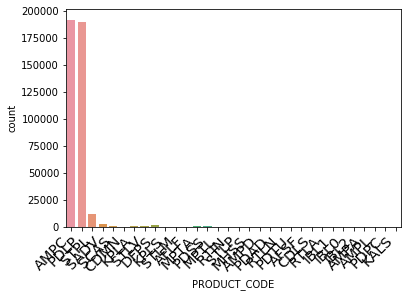

In [10]:
sns.countplot(Master_DF['PRODUCT_CODE'])
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

In [48]:
Master_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400289 entries, 56000 to 999944001
Data columns (total 9 columns):
APPLIED_AMOUNT         400289 non-null float64
APPLICATION_STATUS     400289 non-null object
LOAN_CLASSIFICATION    400289 non-null object
LOAN_REF               400289 non-null object
PRODUCT_CODE           400289 non-null object
BOOK_DATE              400289 non-null object
MATURITY_DATE          400289 non-null object
AMOUNT_FINANCED        400289 non-null float64
DURATION_IN_DAYS       400289 non-null int64
dtypes: float64(2), int64(1), object(6)
memory usage: 40.5+ MB


In [52]:
demographics = pd.read_csv("all_demographics.csv", header=0, sep="|")

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (17,19,26,28,30,35,36,37,38,39,61,71,73,74,85,100,103,114,115,125,126) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [50]:
demographics.head()

,CUSTOMER_UNIQUE_ID,CUSTOMER_TYPE,ADDRESS_LINE3,ADDRESS_LINE4,COUNTRY,NATIONALITY,LANGUAGE,EXPOSURE_COUNTRY,LOCAL_BRANCH,FROZEN,...,SALARY,OTHER_INCOME,RENT,INSURANCE,LOAN_PAYMENT,OTHER_EXPENSES,HOUSE_VALUE,CREDIT_CARDS,E_COUNTRY,CCY_PERS_INCEXP
0,18030000,I,", IKOYI",LAGOS,NG,NG,ENG,NG,3,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33020001,I,", IKORODU",LAGOS,NG,NG,ENG,NG,6,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,69090004,I,Lagos State,", VICTORIA ISLAND",NG,NG,ENG,NG,14,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,81010006,I,"SHAGAMU ROAD, IKORODU",LAGOS,NG,NG,ENG,NG,6,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,71120007,I,", SURULERE",LAGOS,NG,NG,ENG,NG,4,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
demographics = demographics[['CUSTOMER_UNIQUE_ID','LOCAL_BRANCH','SEX', 'MARITAL_STATUS']]#pick only the useful columns

In [13]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17970 entries, 0 to 17969
Data columns (total 4 columns):
CUSTOMER_UNIQUE_ID    17970 non-null int64
LOCAL_BRANCH          17970 non-null int64
SEX                   17950 non-null object
MARITAL_STATUS        17836 non-null object
dtypes: int64(2), object(2)
memory usage: 561.7+ KB


In [54]:
Master_DF=Master_DF.join(demographics.set_index('CUSTOMER_UNIQUE_ID'))

In [15]:
Master_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400289 entries, 56000 to 999944001
Data columns (total 12 columns):
APPLIED_AMOUNT         400289 non-null float64
APPLICATION_STATUS     400289 non-null object
LOAN_CLASSIFICATION    400289 non-null object
LOAN_REF               400289 non-null object
PRODUCT_CODE           400289 non-null object
BOOK_DATE              400289 non-null object
MATURITY_DATE          400289 non-null object
AMOUNT_FINANCED        400289 non-null float64
DURATION_IN_DAYS       400289 non-null int64
LOCAL_BRANCH           400196 non-null float64
SEX                    399997 non-null object
MARITAL_STATUS         397902 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 39.7+ MB


In [55]:
Master_DF.dropna(inplace = True)#.info()#drop rows with null values
Master_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397770 entries, 56000 to 999944001
Data columns (total 12 columns):
APPLIED_AMOUNT         397770 non-null float64
APPLICATION_STATUS     397770 non-null object
LOAN_CLASSIFICATION    397770 non-null object
LOAN_REF               397770 non-null object
PRODUCT_CODE           397770 non-null object
BOOK_DATE              397770 non-null object
MATURITY_DATE          397770 non-null object
AMOUNT_FINANCED        397770 non-null float64
DURATION_IN_DAYS       397770 non-null int64
LOCAL_BRANCH           397770 non-null float64
SEX                    397770 non-null object
MARITAL_STATUS         397770 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 39.5+ MB


In [57]:
Master_DF

,APPLIED_AMOUNT,APPLICATION_STATUS,LOAN_CLASSIFICATION,LOAN_REF,PRODUCT_CODE,BOOK_DATE,MATURITY_DATE,AMOUNT_FINANCED,DURATION_IN_DAYS,LOCAL_BRANCH,SEX,MARITAL_STATUS
CUSTOMER_UNIQUE_ID,,,,,,,,,,,,
56000,35000.0,D,PERFORMING,099AMPC183416809,AMPC,12/7/2018,1/6/2019,3000.0,30,40.0,M,M
56000,35000.0,D,PERFORMING,099PDLP191503001,PDLP,5/30/2019,6/29/2019,9000.0,30,40.0,M,M
56000,35000.0,D,PERFORMING,099PDLP190880084,PDLP,3/29/2019,4/28/2019,10000.0,30,40.0,M,M
56000,35000.0,D,PERFORMING,099PDLP191228110,PDLP,5/2/2019,6/1/2019,9000.0,30,40.0,M,M
56000,35000.0,D,PERFORMING,099PDLP192412008,PDLP,8/29/2019,9/28/2019,135000.0,30,40.0,M,M
...,...,...,...,...,...,...,...,...,...,...,...,...
999944001,4000.0,D,PERFORMING,099PDLP190511320,PDLP,2/20/2019,3/22/2019,12000.0,30,99.0,M,M
999944001,4000.0,D,PERFORMING,099AMPC182642106,AMPC,9/21/2018,10/21/2018,14000.0,30,99.0,M,M
999944001,4000.0,D,PERFORMING,099AMPC181581975,AMPC,6/7/2018,7/7/2018,13000.0,30,99.0,M,M


In [56]:
to_drop = ['APPLIED_AMOUNT', 'APPLICATION_STATUS', 'LOAN_REF', 'BOOK_DATE', 'MATURITY_DATE']
Master_DF.drop(to_drop, inplace = True, axis =1)
Master_DF.head()

,LOAN_CLASSIFICATION,PRODUCT_CODE,AMOUNT_FINANCED,DURATION_IN_DAYS,LOCAL_BRANCH,SEX,MARITAL_STATUS
CUSTOMER_UNIQUE_ID,,,,,,,
56000,PERFORMING,AMPC,3000.0,30,40.0,M,M
56000,PERFORMING,PDLP,9000.0,30,40.0,M,M
56000,PERFORMING,PDLP,10000.0,30,40.0,M,M
56000,PERFORMING,PDLP,9000.0,30,40.0,M,M
56000,PERFORMING,PDLP,135000.0,30,40.0,M,M


In [18]:
Master_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397770 entries, 56000 to 999944001
Data columns (total 7 columns):
LOAN_CLASSIFICATION    397770 non-null object
PRODUCT_CODE           397770 non-null object
AMOUNT_FINANCED        397770 non-null float64
DURATION_IN_DAYS       397770 non-null int64
LOCAL_BRANCH           397770 non-null float64
SEX                    397770 non-null object
MARITAL_STATUS         397770 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [57]:
Master_DF.corr()

,AMOUNT_FINANCED,DURATION_IN_DAYS,LOCAL_BRANCH
AMOUNT_FINANCED,1.000000,0.296806,-0.008581
DURATION_IN_DAYS,0.296806,1.000000,-0.011299
LOCAL_BRANCH,-0.008581,-0.011299,1.000000


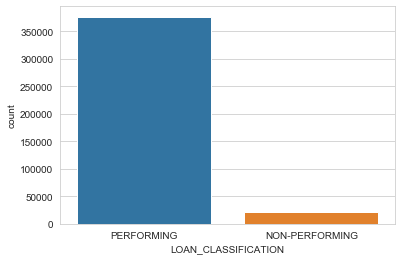

In [61]:
sns.set_style('whitegrid')
sns.countplot(data= Master_DF, x='LOAN_CLASSIFICATION') #explore target variables

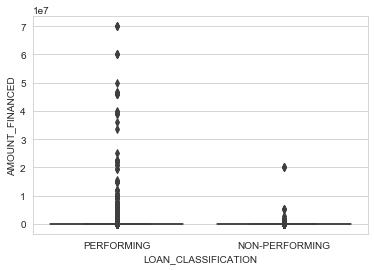

In [67]:
#[Master_DF['AMOUNT_FINANCED']<=100000]
sns.boxplot(data = Master_DF, x='LOAN_CLASSIFICATION', y = 'AMOUNT_FINANCED')

In [20]:
Master_DF['AMOUNT_FINANCED'].max()
Master_DF.drop(Master_DF[Master_DF['AMOUNT_FINANCED']==540484208.6].index, inplace =True)

In [21]:
Master_DF.drop(Master_DF[Master_DF['SEX']=='P'].index, inplace =True)
Master_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397760 entries, 56000 to 999944001
Data columns (total 7 columns):
LOAN_CLASSIFICATION    397760 non-null object
PRODUCT_CODE           397760 non-null object
AMOUNT_FINANCED        397760 non-null float64
DURATION_IN_DAYS       397760 non-null int64
LOCAL_BRANCH           397760 non-null float64
SEX                    397760 non-null object
MARITAL_STATUS         397760 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [22]:
Master_DF['AMOUNT_FINANCED'].max()

70000000.0

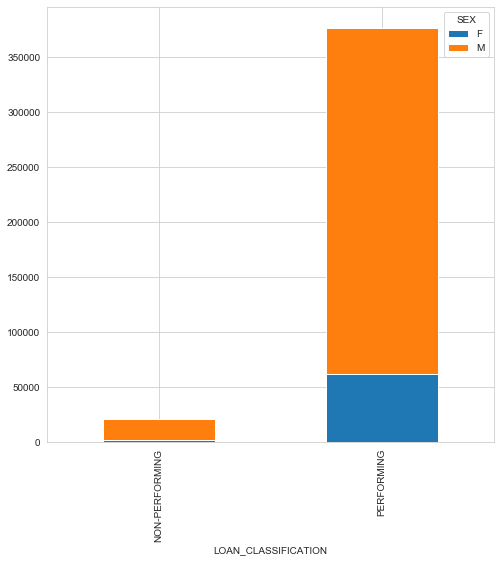

In [71]:
clarity_color_table = pd.crosstab(index = Master_DF['LOAN_CLASSIFICATION'], columns = Master_DF['SEX'])
clarity_color_table.plot(kind = "bar", figsize = (8,8), stacked =True)

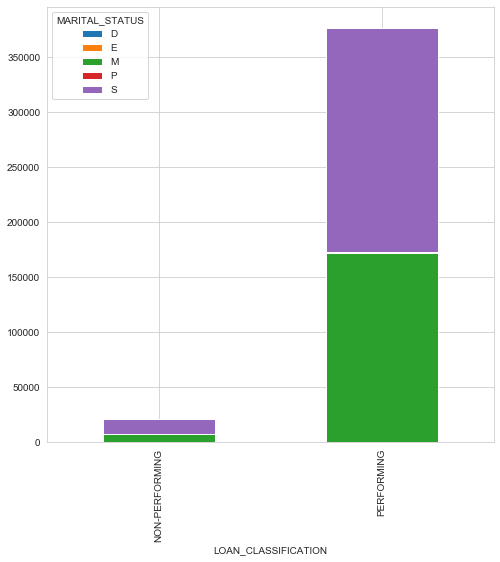

In [73]:
clarity_color_table = pd.crosstab(index = Master_DF['LOAN_CLASSIFICATION'], columns = Master_DF['MARITAL_STATUS'])
clarity_color_table.plot(kind = "bar", figsize = (8,8), stacked =True)

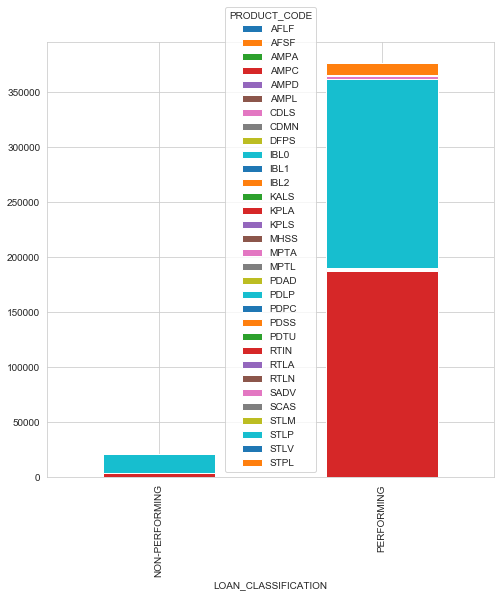

In [74]:
clarity_color_table = pd.crosstab(index = Master_DF['LOAN_CLASSIFICATION'], columns = Master_DF['PRODUCT_CODE'])
clarity_color_table.plot(kind = "bar", figsize = (8,8), stacked =True)

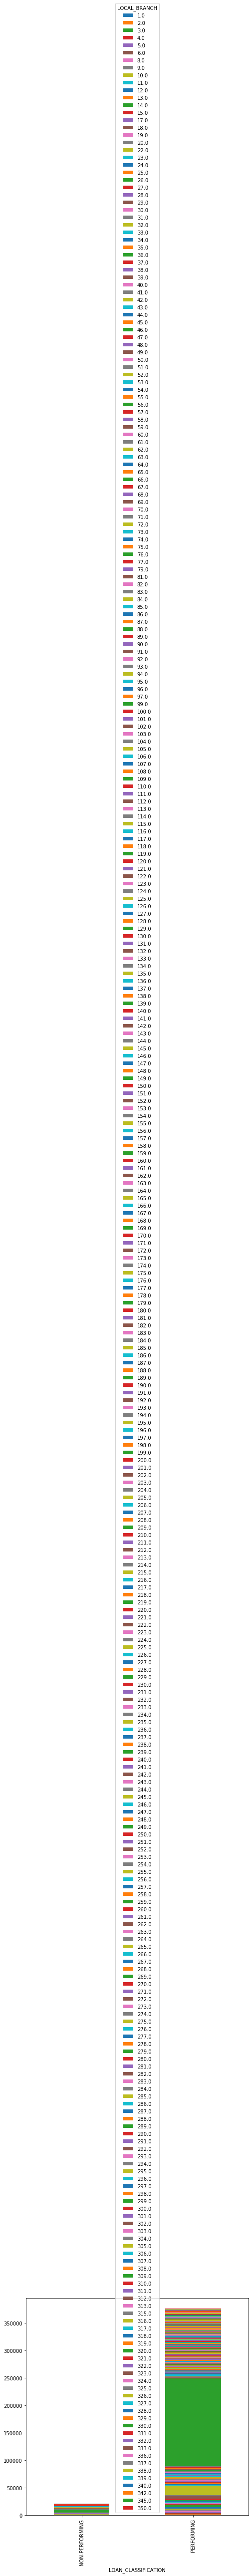

In [63]:
clarity_color_table = pd.crosstab(index = Master_DF['LOAN_CLASSIFICATION'], columns = Master_DF['LOCAL_BRANCH'])
clarity_color_table.plot(kind = "bar", figsize = (8,8), stacked =True)
#plt.figure(figsize = (12,8))
#sns.countplot(data=Master_DF, x = 'LOAN_CLASSIFICATION', hue = 'LOCAL_BRANCH')

In [23]:
#Convert categorical data to dummy variables

prod_code_dummy = pd.get_dummies(Master_DF['PRODUCT_CODE'], drop_first = True)
Master_DF = pd.concat([Master_DF, prod_code_dummy], axis = 1)
Master_DF.drop('PRODUCT_CODE', axis = 1, inplace = True)
loc_branch_dummy = pd.get_dummies(Master_DF['LOCAL_BRANCH'], drop_first = True)
Master_DF = pd.concat([Master_DF, loc_branch_dummy], axis = 1)
Master_DF.drop('LOCAL_BRANCH', axis = 1, inplace = True)
sex_dummy = pd.get_dummies(Master_DF['SEX'], drop_first = True)
Master_DF = pd.concat([Master_DF, sex_dummy], axis = 1)
Master_DF.drop('SEX', axis = 1, inplace = True)
marital_dummy = pd.get_dummies(Master_DF['MARITAL_STATUS'], drop_first = True)
Master_DF = pd.concat([Master_DF, marital_dummy], axis = 1)
Master_DF.drop('MARITAL_STATUS', axis = 1, inplace = True)


In [24]:
Loan_classification = pd.get_dummies(Master_DF['LOAN_CLASSIFICATION'],drop_first=True)
Master_DF.drop('LOAN_CLASSIFICATION', axis = 1, inplace=True)
Master_DF['LOAN_CLASSIFICATION'] = Loan_classification

In [25]:
Master_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397760 entries, 56000 to 999944001
Columns: 372 entries, AMOUNT_FINANCED to LOAN_CLASSIFICATION
dtypes: float64(1), int64(1), uint8(370)
memory usage: 149.5 MB


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Master_DF.drop('LOAN_CLASSIFICATION',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Master_DF.drop('LOAN_CLASSIFICATION', axis =1), Master_DF['LOAN_CLASSIFICATION'], test_size = 0.3, random_state = 101)

In [28]:
from sklearn.linear_model import LogisticRegression
LogRegModel = LogisticRegression()
LogRegModel.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_train_predict = LogRegModel.predict(X_train)

In [30]:
y_test_predict = LogRegModel.predict(X_test)

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [32]:
print(classification_report(y_train,y_train_predict))


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     14858
           1       0.95      1.00      0.97    263574

    accuracy                           0.95    278432
   macro avg       0.47      0.50      0.49    278432
weighted avg       0.90      0.95      0.92    278432



In [33]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6242
           1       0.95      1.00      0.97    113086

    accuracy                           0.95    119328
   macro avg       0.47      0.50      0.49    119328
weighted avg       0.90      0.95      0.92    119328



In [35]:
print(confusion_matrix(y_train,y_train_predict))

[[     0  14858]
 [     0 263574]]


In [34]:
print(confusion_matrix(y_test,y_test_predict))

[[     0   6242]
 [     0 113086]]


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
Rand_For_model = RandomForestClassifier(n_estimators = 10, verbose =2)
Rand_For_model.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   28.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=2, warm_start=False)

In [45]:
train_predictions = Rand_For_model.predict(X_train)
train_accuracy = accuracy_score(train_predictions,y_train)
test_predictions = Rand_For_model.predict(X_test)
test_accuracy = accuracy_score(test_predictions,y_test)
print(train_accuracy, test_accuracy)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


0.9653021204459258 0.9564729149906142


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished
